# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import math
%matplotlib inline

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
n = len(data[data.race=='b'])
p = sum(data[data.race=='b'].call) / n
q = 1 - p
npq = n * p * q
npq

146.87720739219711

In [5]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [6]:
n = len(data[data.race=='w'])
p = sum(data[data.race=='w'].call) / n
q = 1 - p
npq = n * p * q
npq

212.32032854209444

In [7]:
# total size of sample
len(data)

4870

In [8]:
# number of white-sounding names
len(data[data.race=='w'])

2435

In [9]:
# number of black-sounding names
len(data[data.race=='b'])

2435

# What test is appropriate; does CLT apply?

For this scenario we have two binomial distributions and we want to test if the difference in proportions between these two distributions is significant. 

The Central Limit Theory tells us that a binomial distribution is approximately normal. And it is a reasonable approximation if $npq \ge 5$

In this case for black-sounding names $npq \approx 146.9$ and for white-sounding names it's $\approx 212.3$


So we can use a Z test statistic.

# What are the null and alternate hypotheses?

The null hypothesis is that the proportions of both samples are equal, and the alternate hypothesis is that the proportions of both samples are not equal.

$H_{0}: \hat p_{b} = \hat p_{w}$ or that    $\hat p_{b} - \hat p_{w} = 0$

$H_{a}: \hat p_{b} \ne \hat p_{w}$ or that    $\hat p_{b} - \hat p_{w} \ne 0$

# Compute margin of error, confidence interval, and p-value

Pooled Sample Proportion

$p = \frac{Success_{b} + Success_{w} }{n_{b} + n_{w}}$ 

Standard Error

$SE = \sqrt{p(1 - p)( \frac{1}{n_{b}} + \frac{1}{n_{w}} )}$

$Z = \frac{(\hat p_{b} - \hat p_{w}) - 0}{ \sqrt{ p(1 - \hat p) (\frac{1}{n_{b}} + \frac{1}{n_{w}}) }}$



In [10]:
n_b = float(len(data[data.race=='b']))
n_w = float(len(data[data.race=='w']))

suc_b = sum(data[data.race=='b'].call)
suc_w = sum(data[data.race=='w'].call)

p_hat_b = suc_b / n_b
p_hat_w = suc_w / n_w

p = (suc_b + suc_w) / (n_b + n_w)

se = math.sqrt( p * (1 - p) * ( (1 / n_b) + (1 / n_w) ) )

z = (p_hat_b - p_hat_w) / se

z

-4.1084121524343464

In [11]:
# our p-value is 2x the area under the curve at Z
stats.norm.cdf(z) * 2

3.9838868375850767e-05

So our p-value is $3.98 * 10^{-5}$ this is sufficient evidence to reject the null hypothesis and conclude that indeed there is a difference between the proportion of interviews a 'black-sounding' name gets compared to a 'white-sounding' name on a resumé.

In [12]:
# 95% CI
diff = p_hat_b - p_hat_w
ci = [diff - se * 1.96, diff + se * 1.96]
ci

[-0.047314766520339682, -0.016750941898551489]

We are 95% confident that the true difference in proportion is between 0.047 and 0.017, or 4.7% and 1.7%

In [13]:
# margin of error
me = 1.96 * se
me

0.015281912310894095

Our margin of error for the true difference in proportions is $\approx 0.0153$ or 1.5%

# Story

### Identical resumés with black-sounding names are less likely to get interviews, compared to white-sounding names

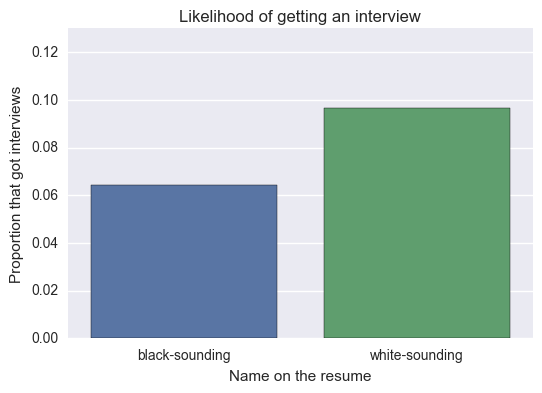

In [14]:
ax = sns.barplot(['black-sounding', 'white-sounding'], [p_hat_b, p_hat_w])
ax.set_title('Likelihood of getting an interview')
ax.set_ylabel('Proportion that got interviews')
ax.set_xlabel('Name on the resume')
ax.set_ylim([0,0.13])
None

Identical resumés were submitted to US companies that were randomly assigned white-sounding or black-sounding names. Then it was recorded which of these resumés recieved requests for interviews.

The proportion of resumés which recieved interview request with white-sounding names was significantly higher than it was for black-sounding names. White-sounding resumés recieved about 3%$\pm$1.5% more interview requests than black-sounding resumés.

Statistical analysis of this data revealed that there is less than a .0004% chance that there is a difference between these two groups purely by random chance. 

So this strongly suggests that there is inherent bias against black-sounding names in the hiring process at the average US company.

# Is race/name the most important factor?

This analysis does not show that a person's race or their name are the most important factor in getting a callback. Just that it does have an effect.

Finding out the most important factor would involve considering each variable in predicting the callback outcome. An F-test could be done to identify the most important factors, or which are unimportant in a linear regression model of this data. Additionally, each variable could be analyzed independently and the one that offers the most predictive value could then be identified.

It is also possible that some unstudied value or a variable that wasn't capture in this data could be the most important factor in receiving a callback.